<a href="https://colab.research.google.com/github/Hameon4/Tensorflow-2.0-Practice/blob/main/TF2_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
# load the data 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Scale them between 0 and 1
print(f'x_train.shape: {x_train.shape}')

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [5]:
# Build the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
#Compile the model
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [7]:
# Train the model 
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2976 - accuracy: 0.9133 - val_loss: 0.1367 - val_accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1458 - accuracy: 0.9570 - val_loss: 0.1024 - val_accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1072 - accuracy: 0.9669 - val_loss: 0.0837 - val_accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0882 - accuracy: 0.9731 - val_loss: 0.0713 - val_accuracy: 0.9779
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0736 - accuracy: 0.9772 - val_loss: 0.0759 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0644 - accuracy: 0.9795 - val_loss: 0.0761 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0578 - accuracy: 0.9810 - val_loss: 0.0658 - val_accuracy:

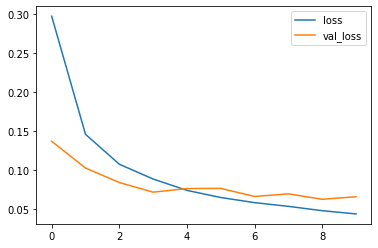

In [12]:
# Plot the loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

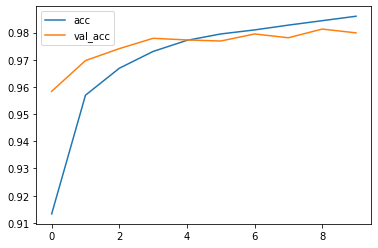

In [11]:
# Plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [14]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9799
[0.06539946049451828, 0.9799000024795532]


Confusion matrix, without normalization
[[ 968    0    3    2    1    1    1    1    3    0]
 [   0 1124    2    3    0    0    1    1    4    0]
 [   2    0 1017    2    3    0    1    3    4    0]
 [   0    0    3  999    0    1    0    4    2    1]
 [   0    0    6    0  955    0    4    1    1   15]
 [   2    0    0   13    0  870    3    0    3    1]
 [   3    3    1    1    2    5  941    0    2    0]
 [   1    6   13    8    0    0    0  996    1    3]
 [   4    0    5    6    2    3    1    3  947    3]
 [   1    3    0    8    4    4    0    5    2  982]]


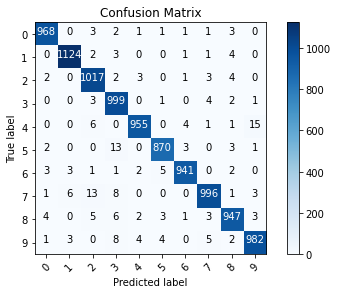

In [15]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np 
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))